# Simple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('CA_housing.csv')


In [17]:
dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [3]:
dataset = dataset.dropna(axis=0)
dataset

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20433 rows x 10 columns]

In [35]:
dataset.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20433.000000  
mean        206864.413155  
std         115435.667099  
min          14999.000000  
25%         119500.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<Figure size 432x720 with 0 Axes>

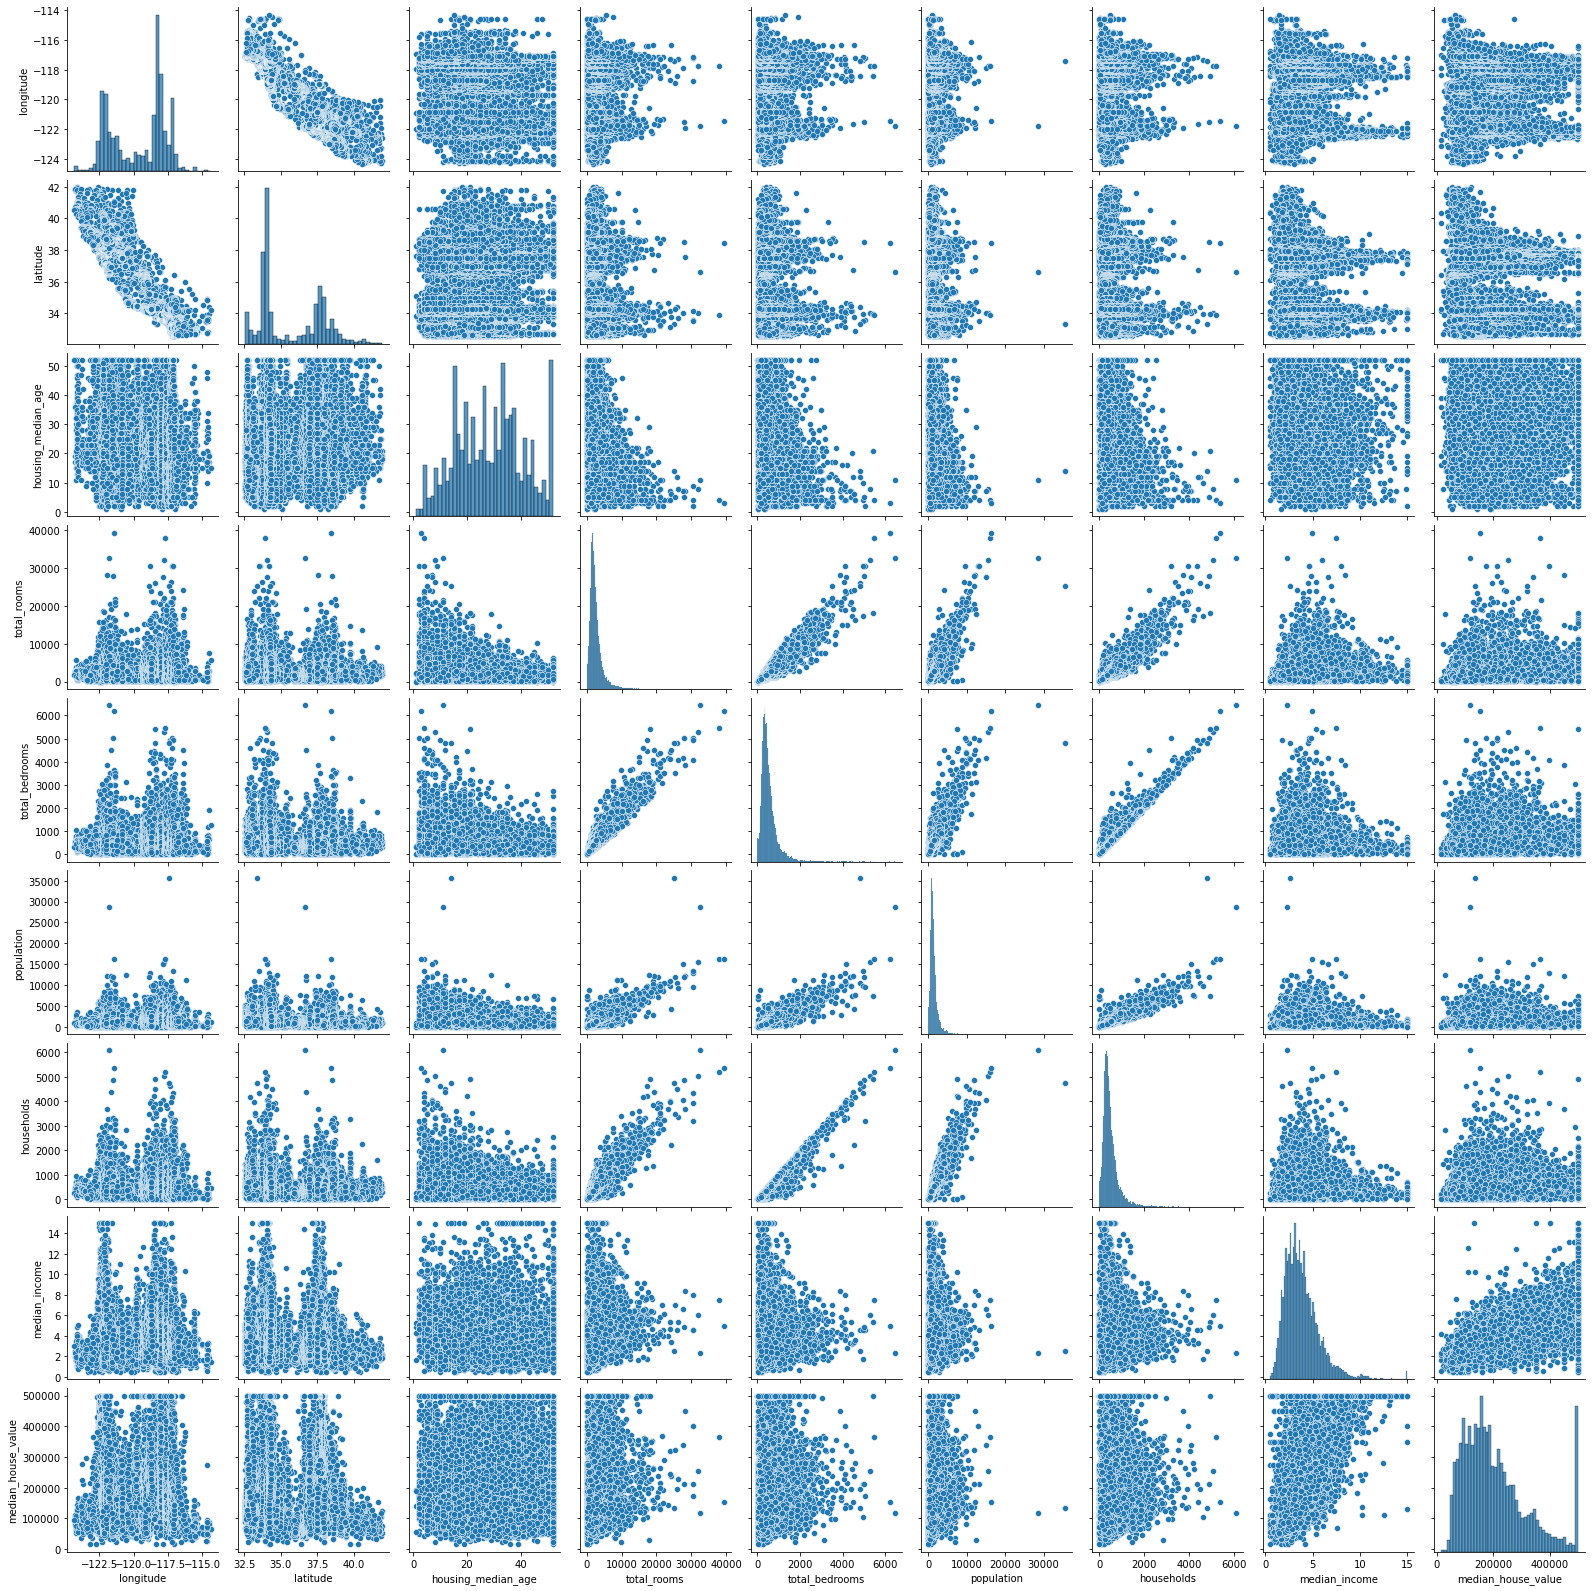

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,10))
sns.pairplot(dataset)
plt.show()

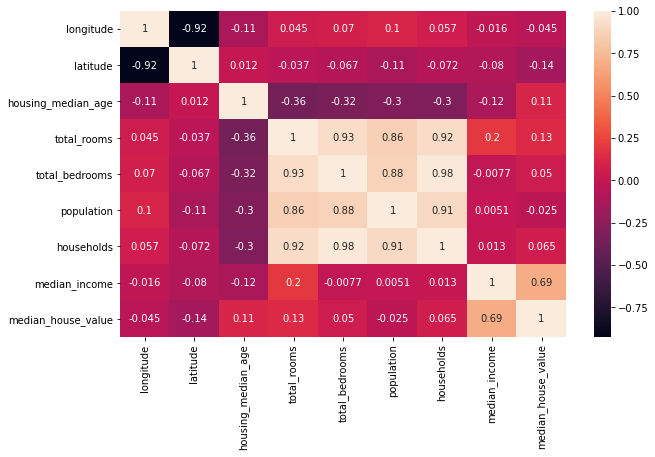

In [43]:
corr=dataset.corr()
plt.figure(figsize=(10,6));
sns.heatmap(corr,annot=True)

In [4]:
dataset = dataset[['median_income', 'median_house_value']]
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

In [64]:
dataset.columns

Index(['median_income', 'median_house_value'], dtype='object')

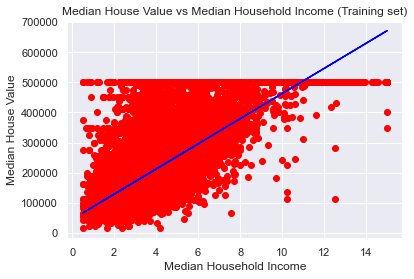

In [65]:
import seaborn as sns
sns.set()
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Median House Value vs Median Household Income (Training set)')
plt.xlabel('Median Household Income')
plt.ylabel('Median House Value')
plt.show()

## Visualising the Test set results

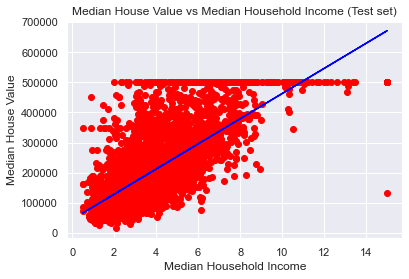

In [66]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Median House Value vs Median Household Income (Test set)')
plt.xlabel('Median Household Income')
plt.ylabel('Median House Value')
plt.show()

## Predicting the Test set results

In [10]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[165268.61  98900.  ]
 [192391.23 153000.  ]
 [101417.78  91300.  ]
 ...
 [145957.3  127000.  ]
 [177331.92 158600.  ]
 [219288.53 175000.  ]]


In [13]:
df = pd.DataFrame(data=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), columns=['Predicted ($)', 'Actual ($)'])
df

Predicted ($)  Actual ($)
0     165268.606970     98900.0
1     192391.231023    153000.0
2     101417.777237     91300.0
3     348901.289944    345200.0
4     314989.664455    344100.0
...             ...         ...
4082  155975.978698     76300.0
4083  228410.075766    261600.0
4084  145957.298644    127000.0
4085  177331.915606    158600.0
4086  219288.528661    175000.0

[4087 rows x 2 columns]

In [16]:
import dataframe_image as dfi
dfi.export(df, 'act_pred_slr.png', max_rows=5)

In [17]:
px = np.linspace(0, max(y_test), int(max(y_test)))
py = np.linspace(0, max(y_test), int(max(y_test)))

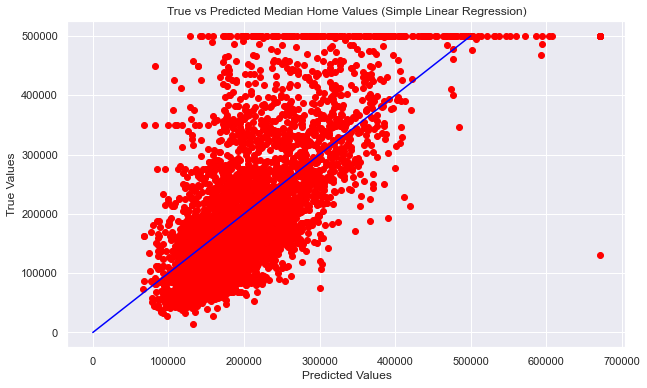

In [18]:
plt.figure(figsize=(10,6))
import seaborn as sns
sns.set()
plt.scatter(y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1), color = 'red')
plt.plot(px, py, color='blue')
plt.title('True vs Predicted Median Home Values (Simple Linear Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

## Model Parameters

In [11]:
print(regressor.coef_)
print(regressor.intercept_)

[41727.11]
45303.15442674578


## Evaluating the Regression Model

In [25]:
from sklearn.metrics import r2_score
print('R2: ', r2_score(y_test, y_pred))
print('Adjusted R2: ', 1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

R2:  0.47755683304256524
Adjusted R2:  0.4774289399784386


In [22]:
from sklearn.metrics import mean_squared_error
import math
mean_squared_error(y_test, y_pred, squared=False)

83638.20882047249